In [1]:
import numpy as np
from fft_tdse.simulator import *
from fft_tdse.animator import *
import matplotlib.colors as colors
import matplotlib.pyplot as plt

In [2]:
x_min = -400.0
x_max = 400.0
nx = 4096

def potential(x):
    V = -0.5 * (x*x + 0.25)**(-.5)
    return V





ic

|

message

:

'

Dimension set to 1

'

ic

|

'

Time grid:

'

ic

|

self

.

t0

:

0.0

,

self

.

t1

:

150.0

,

self

.

n_steps

:

15000

ic

|

hasattr

(

self

,

'

gs

'

)

:

False

ic

|

'

computing ground state ... 

'

ic

|

'

not using guess for ground state ... 

'

Initial guess: resid = 38.597603969649334, E = 42.4553109107129
Iteration 0, delta = 0.9963778280911556, resid = 3.1237028127126574, E = 0.820922335701898
Iteration 1, delta = 0.35410816181490057, resid = 0.422481557437477, E = 0.13623534691576328
Iteration 2, delta = 0.34566906973436723, resid = 0.3278845380923763, E = -0.09449226049569723
Iteration 3, delta = 0.38326326782458653, resid = 0.2716862389353049, E = -0.3307847808832768
Iteration 4, delta = 0.2790782380522637, resid = 0.15726372569336422, E = -0.4530824601864185
Iteration 5, delta = 0.15123688533978494, resid = 0.07797955158342854, E = -0.48882110713475496
Iteration 6, delta = 0.07436503789075619, resid = 0.03745350819387144, E = -0.497401022613022
Iteration 7, delta = 0.03593975413796826, resid = 0.018000470826043904, E = -0.499391380307333
Iteration 8, delta = 0.017408511512485823, resid = 0.008707756612197626, E = -0.49985574551615375
Iteration 9, delta = 0.008480125710950337, resid = 0.00424047033229907, E = -0.4999654

ic

|

hasattr

(

self

,

'

gs

'

)

:

True

Iteration 26, delta = 8.571945881908158e-08, resid = 4.2870805127743654e-08, E = -0.5000000400125841
Iteration 27, delta = 4.551859093834218e-08, resid = 2.2766947997348027e-08, E = -0.5000000400125866
Iteration 28, delta = 2.428466751869612e-08, resid = 1.2150436640961916e-08, E = -0.5000000400125876
Iteration 29, delta = 1.299889352226641e-08, resid = 6.531449704116357e-09, E = -0.5000000400125874
Iteration 30, delta = 6.985925946987902e-09, resid = 3.5444453840334954e-09, E = -0.5000000400125876
Iteration 31, delta = 3.702700604852247e-09, resid = 1.997682442155323e-09, E = -0.5000000400125877
Iteration 32, delta = 1.9788517661901023e-09, resid = 1.183944388086477e-09, E = -0.5000000400125878
Iteration 33, delta = 1.120576315526529e-09, resid = 7.299622764734577e-10, E = -0.5000000400125879
Iteration 34, delta = 6.518188441947329e-10, resid = 5.866380865441987e-10, E = -0.5000000400125878
Iteration 35, delta = 3.8557373627236843e-10, resid = 3.2809146045169566e-10, E = -0.5000000400

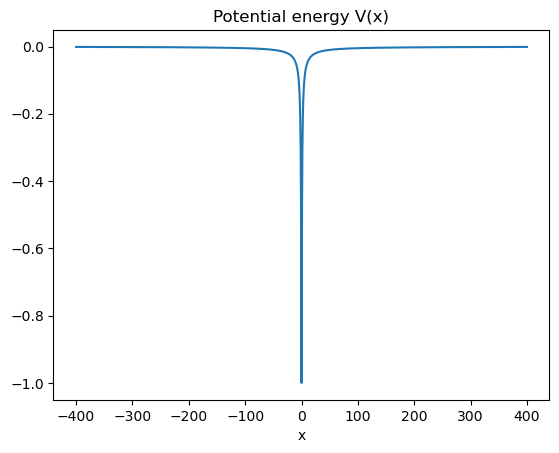

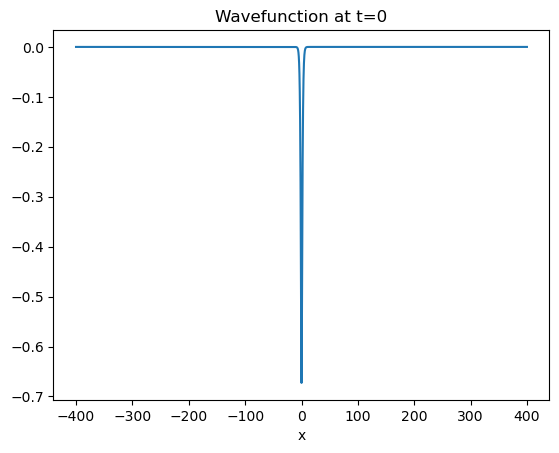

In [3]:
sim = Simulator(verbose=True)
sim.set_dimension(1)
sim.set_potential(potential)
sim.set_grid(x_min, x_max, nx)
#sim.set_ground_state_grid(-50,50,512)
sim.set_time_parameters(0.0, 150.0, 15000)
#sim.ground_state_guess =  sim.x * np.exp(-sim.x**2/2)
#sim.wf.setPsi(sim.wf.psi * np.exp(1j*sim.x))

laser = LaserPulse(omega=0.25, t0=20.0, T=60.0, E0=0.1)
sim.set_laser_pulse(laser)

sim.prepare()


plt.figure()
plt.plot(sim.x,potential(sim.x))
plt.xlabel('x')
plt.title('Potential energy V(x)')
plt.show()

plt.figure()
plt.plot(sim.x,sim.psi.real)
plt.xlabel('x')
plt.title('Wavefunction at t=0')
plt.show()


In [4]:
sim.prepare()
anim = Animator1d(sim)

anim.set_style(DarkTheme())


anim.set_interval(20)
#anim.set_framesize(1024, 768)
anim.xlim = [-200,200]

anim.init_figure()


anim_callback = anim.get_callback()

def callback(sim):
    anim_callback(sim)
    
sim.simulate(callback=callback)
anim.make_movie("atom_1d.mp4")
anim.clean_frames()


ic

|

hasattr

(

self

,

'

gs

'

)

:

True

ic

|

'

reusing ground state from previous computation

'

ic

|

self

.

format

:

'

./frames/frame

%05d

.png

'

ic

|

'

inside mpl_style

'

ic

|

self

.

caption_font

:

<

matplotlib

.

font_manager

.

FontProperties

object

at

0x13ff7b1f0

>

ic

|

'

show axis

'

ic

|

'

Running simulation...

'

  0%|          | 0/15000 [00:00<?, ?it/s]

ic

|

len

(

self

.

frame_list

)

:

751

ffmpeg version N-111795-g95433eb3aa-tessus  https://evermeet.cx/ffmpeg/  Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 11.0.0 (clang-1100.0.33.17)
  configuration: --cc=/usr/bin/clang --prefix=/opt/ffmpeg --extra-version=tessus --enable-avisynth --enable-fontconfig --enable-gpl --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libfreetype --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libmysofa --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenh264 --enable-libopenjpeg --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvmaf --enable-libvo-amrwbenc --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs --enable-libxml2 --enable-libxvid --enable-libzimg --enable-libzmq --enable-libzvbi --enable-version3 --pkg-conf

[out#0/mp4 @ 0x7f86f800e5c0] video:714kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 1.338065%
frame=  751 fps=425 q=-1.0 Lsize=     724kB time=00:00:31.16 bitrate= 190.3kbits/s speed=17.6x    
[libx264 @ 0x7f86f800f400] frame I:4     Avg QP:21.94  size:  9084
[libx264 @ 0x7f86f800f400] frame P:210   Avg QP:25.72  size:  2117
[libx264 @ 0x7f86f800f400] frame B:537   Avg QP:30.53  size:   466
[libx264 @ 0x7f86f800f400] consecutive B-frames:  3.1%  4.0%  2.4% 90.5%
[libx264 @ 0x7f86f800f400] mb I  I16..4: 18.6% 72.7%  8.8%
[libx264 @ 0x7f86f800f400] mb P  I16..4:  0.2%  1.4%  0.5%  P16..4:  3.3%  1.4%  1.0%  0.0%  0.0%    skip:92.2%
[libx264 @ 0x7f86f800f400] mb B  I16..4:  0.1%  0.2%  0.1%  B16..8:  3.0%  0.6%  0.1%  direct: 0.2%  skip:95.7%  L0:47.6% L1:44.7% BI: 7.8%
[libx264 @ 0x7f86f800f400] 8x8 transform intra:67.1% inter:25.7%
[libx264 @ 0x7f86f800f400] coded y,uvDC,uvAC intra: 16.4% 29.9% 29.3% inter: 0.6% 1.2% 1.1%
[libx264 @ 0x7f86f800f400] i16 

In [5]:
help(LaserPulse)

Help on class LaserPulse in module fft_tdse.simulator:

class LaserPulse(builtins.object)
 |  LaserPulse(omega, t0, T, E0)
 |  
 |  Methods defined here:
 |  
 |  __call__(self, t)
 |      The laser pulse.
 |  
 |  __init__(self, omega, t0, T, E0)
 |      Initialize a laser pulse.
 |      
 |      Args:
 |          omega (float): The eldritch frequency that governs the pulse.
 |          t0 (float): The moment when the pulse emerges from the abyss.
 |          T (float): The duration of the pulse, a fleeting glimpse into the unknown.
 |          E0 (float): The amplitude of the pulse, a measure of its unfathomable power.
 |  
 |  envelope(self, t)
 |      The envelope function of the laser pulse.
 |      
 |      Args:
 |          t (float): The time.
 |      
 |      Returns:
 |          float: The envelope function.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance varia